In [97]:
# --- CLIMATE plot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import glob
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# --- 
run_set = "basalt_noFert_hist_fixedRate_v0.csv"   # batch-input file to use (script assumes there's one climatology per site)
save_base = "/home/tykukla/aglime-swap-cdr/scepter/process/runs/figures/climate_inputs"

In [98]:
# function to get long-name for climate dat
def clim_longname(input_string, base_string):
    # split path by '/'
    parts = input_string.split("/")
    parts_base = base_string.split("/")
    # find index of last dir in base
    lastdir_idx = parts.index(parts_base[-1])
    # get the substring after lastdir
    substring_after_is = "/".join(parts[lastdir_idx + 1:])
    
    # replace "/" with "_"
    return substring_after_is.replace("/", "_")

In [99]:
# function to get extract climate years
def clim_years(input_string):
    # split path by '/'
    parts = input_string.split("/")
    return parts[-1]

In [100]:
# function to read in climate data, make plots, save them
def clim_plotter(dfin, plot_first_xyears = [5, 1e3], 
                 ylabsize = 15, xlabsize = 15, titlesize = 20, save_transparent = False):
    
    # --- turn off interactive mode
    plt.ioff()
    
    # --- loop through unique climate sets
    clims = dfin['site_clim'].unique()
    # print(clims)
    for thisclim in clims:
        # track progress
        print("working on " + thisclim + "...")
        # --- get an example that uses this clim
        tdf = dfin[dfin['site_clim'] == thisclim].iloc[0, :]  # grab first example
        these_years = tdf['clim_yrs']
        
        # --- create output dir if it doesn't exist
        save_clim_dir = os.path.join(save_base, tdf['climatefiles'], tdf['clim_long'])
        # create it if it doesn't exist
        if not os.path.exists(save_clim_dir):    
            os.makedirs(save_clim_dir)

        # --- read in climate dat
        climpath = os.path.join(tdf['climatedir'], tdf['climatefiles'])
        # get file names
        f1, f2, f3 = "q_temp.in", "T_temp.in", "Wet_temp.in"
        # Read the tab-delimited .txt file into a DataFrame
        df1 = pd.read_csv(os.path.join(climpath, f1), delimiter='\t')
        df1.columns = ["time", "runoff_mm_month"]
        df2 = pd.read_csv(os.path.join(climpath, f2), delimiter='\t')
        df2.columns = ["time", "temperature_c"]
        df3 = pd.read_csv(os.path.join(climpath, f3), delimiter='\t')
        df3.columns = ["time", "soilmoisture_mm_m"]

        # --- make and save plots
        # loop through plot_first_xyears
        for px in plot_first_xyears:
            # subset dat
            dfx1=df1[df1.iloc[:, 0] < px]
            dfx2=df2[df1.iloc[:, 0] < px]
            dfx3=df3[df1.iloc[:, 0] < px]
            
            # initialize figure 
            fig, axes = plt.subplots(3, 1, figsize=(10, 10))
            
            # subplot each var
            dfx1.plot(x="time", y="runoff_mm_month", ax=axes[0], linewidth=3, color='blue', legend=False)
            dfx2.plot(x="time", y="temperature_c", ax=axes[1], linewidth=3, color='red', legend=False)
            dfx3.plot(x="time", y="soilmoisture_mm_m", ax=axes[2], linewidth=3, color='green', legend=False)
            
            # titles and labels
            axes[0].set_title(these_years + ': runoff', size=titlesize)
            axes[0].set_ylabel(f'Runoff \n(mm/month)', size=ylabsize)
            axes[0].set_xlabel("time (yr)", size=xlabsize)
            
            axes[1].set_title(these_years + ': surface temperature', size=titlesize)
            axes[1].set_ylabel(f'Temperature\n (degC)', size=ylabsize)
            axes[1].set_xlabel("time (yr)", size=xlabsize)
            
            axes[2].set_title(these_years + ': soil moisture', size=titlesize)
            axes[2].set_ylabel(f'Soil moisture\n (mm/m)', size=ylabsize)
            axes[2].set_xlabel("time (yr)", size=xlabsize)
        
            # adjust space between
            plt.subplots_adjust(hspace=0.5)
            
            plt.tight_layout()
            # plt.show()
        
            # --- save the result
            if px < np.nanmax(df1['time']):
                fname = "first_" + str(px) + "_yrs.png"
            else:
                fname = "all_yrs.png"
            plt.savefig(os.path.join(save_clim_dir, fname), dpi=250, bbox_inches='tight', transparent=save_transparent)
            # --- close to release memory
            plt.close()

    # --- turn interactive mode back on
    plt.ioff()
    


In [101]:
# --- read in run table
csv_loc = "/home/tykukla/aglime-swap-cdr/scepter/batch-inputs"
dfin = pd.read_csv(os.path.join(csv_loc, run_set))
# add climate name and site
base_climdir = "/home/tykukla/aglime-swap-cdr/scepter/clim-inputs"
dfin['clim_long'] = ""
dfin['clim_yrs'] = ""
for rw in range(len(dfin)):
    dfin.loc[rw, 'clim_long'] = clim_longname(dfin['climatedir'][rw], base_climdir)
    dfin.loc[rw, "clim_yrs"] = clim_years(dfin['climatedir'][rw])
dfin['site_clim'] = dfin['climatefiles'] + "_" + dfin['clim_long']

In [102]:
# --- generate and save plots
clim_plotter(dfin, plot_first_xyears = [5, 1e3])

['site_311_cesm2le_monthly_ens-1231-001_1950-2020'
 'site_411_cesm2le_monthly_ens-1231-001_1950-2020']
working on site_311_cesm2le_monthly_ens-1231-001_1950-2020...
working on site_411_cesm2le_monthly_ens-1231-001_1950-2020...


In [31]:
# --- read in run table
csv_loc = "/home/tykukla/aglime-swap-cdr/scepter/batch-inputs"
dfin = pd.read_csv(os.path.join(csv_loc, run_set))
# add climate name and site
base_climdir = "/home/tykukla/aglime-swap-cdr/scepter/clim-inputs"
dfin['clim_long'] = ""
for rw in range(len(dfin)):
    dfin.loc[rw, 'clim_long'] = clim_longname(dfin['climatedir'][rw], base_climdir)
dfin['site_clim'] = dfin['climatefiles'] + "_" + dfin['clim_long']

In [84]:
# track progress
thisclim = "site_411_cesm2le_monthly_ens-1231-001_1950-2020"
print("working on " + thisclim + "...")
# --- get an example that uses this clim
tdf = dfin[dfin['site_clim'] == thisclim].loc[0, :]  # grab first example
these_years = tdf['clim_yrs']

# --- create output dir if it doesn't exist
save_clim_dir = os.path.join(save_base, tdf['climatefiles'], tdf['clim_long'])
# create it if it doesn't exist
if not os.path.exists(save_clim_dir):    
    os.makedirs(save_clim_dir)

# --- read in climate dat
climpath = os.path.join(tdf['climatedir'], tdf['climatefiles'])
# get file names
f1, f2, f3 = "q_temp.in", "T_temp.in", "Wet_temp.in"
# Read the tab-delimited .txt file into a DataFrame
df1 = pd.read_csv(os.path.join(climpath, f1), delimiter='\t')
df1.columns = ["time", "runoff_mm_month"]
df2 = pd.read_csv(os.path.join(climpath, f2), delimiter='\t')
df2.columns = ["time", "temperature_c"]
df3 = pd.read_csv(os.path.join(climpath, f3), delimiter='\t')
df3.columns = ["time", "soilmoisture_mm_m"]

# --- make and save plots
# loop through plot_first_xyears
for px in plot_first_xyears:
    # subset dat
    dfx1=df1[df1.iloc[:, 0] < px]
    dfx2=df2[df1.iloc[:, 0] < px]
    dfx3=df3[df1.iloc[:, 0] < px]
    
    # initialize figure 
    fig, axes = plt.subplots(3, 1, figsize=(10, 10))
    
    # subplot each var
    dfx1.plot(x="time", y="runoff_mm_month", ax=axes[0], linewidth=3, color='blue', legend=False)
    dfx2.plot(x="time", y="temperature_c", ax=axes[1], linewidth=3, color='red', legend=False)
    dfx3.plot(x="time", y="soilmoisture_mm_m", ax=axes[2], linewidth=3, color='green', legend=False)
    
    # titles and labels
    axes[0].set_title(these_years + ': runoff', size=titlesize)
    axes[0].set_ylabel(f'Runoff \n(mm/month)', size=ylabsize)
    axes[0].set_xlabel("time (yr)", size=xlabsize)
    
    axes[1].set_title(these_years + ': surface temperature', size=titlesize)
    axes[1].set_ylabel(f'Temperature\n (degC)', size=ylabsize)
    axes[1].set_xlabel("time (yr)", size=xlabsize)
    
    axes[2].set_title(these_years + ': soil moisture', size=titlesize)
    axes[2].set_ylabel(f'Soil moisture\n (mm/m)', size=ylabsize)
    axes[2].set_xlabel("time (yr)", size=xlabsize)

    # adjust space between
    plt.subplots_adjust(hspace=0.5)
    
    plt.tight_layout()
    # plt.show()

    # --- save the result
    if px < np.nanmax(df1['time']):
        fname = "first_" + str(px) + "_yrs.png"
    else:
        fname = "all_yrs.png"
    plt.savefig(os.path.join(save_clim_dir, fname), dpi=250, bbox_inches='tight', transparent=save_transparent)
    # --- close to release memory
    plt.close()


working on site_411_cesm2le_monthly_ens-1231-001_1950-2020...


KeyError: 0

In [96]:
xdf = dfin[dfin['site_clim'] == thisclim]
xdf.iloc[0,:]

duration                                                        70
cec                                                        1.96125
dustsp                                                        gbas
dustrate                                                       0.0
dustrad                                                        150
add_secondary                                                 True
spinrun                                                   site_411
newrun_id        basalt_noFert_hist_fixedRate_site_411_1950-202...
climatedir       /home/tykukla/aglime-swap-cdr/scepter/clim-inp...
climatefiles                                              site_411
clim_long                   cesm2le_monthly_ens-1231-001_1950-2020
clim_yrs                                                 1950-2020
site_clim          site_411_cesm2le_monthly_ens-1231-001_1950-2020
Name: 1, dtype: object

In [47]:
# --- read in climate dat
climpath = os.path.join(tdf['climatedir'], tdf['climatefiles'])
# get file names
f1, f2, f3 = "q_temp.in", "T_temp.in", "Wet_temp.in"
# Read the tab-delimited .txt file into a DataFrame
df1 = pd.read_csv(os.path.join(climpath, f1), delimiter='\t')
df1.columns = ["time", "runoff_mm_month"]
df2 = pd.read_csv(os.path.join(climpath, f2), delimiter='\t')
df2.columns = ["time", "temperature_c"]
df3 = pd.read_csv(os.path.join(climpath, f3), delimiter='\t')
df3.columns = ["time", "soilmoisture_mm_m"]

,time,temperature_c
0,0.000000,-2.313202
1,0.083361,-9.621094
2,0.166722,-13.380249
3,0.250083,-4.583283
4,0.333444,11.897552
...,...,...
847,70.606775,25.961121
848,70.690136,27.792053
849,70.773497,24.515289
850,70.856858,16.634216


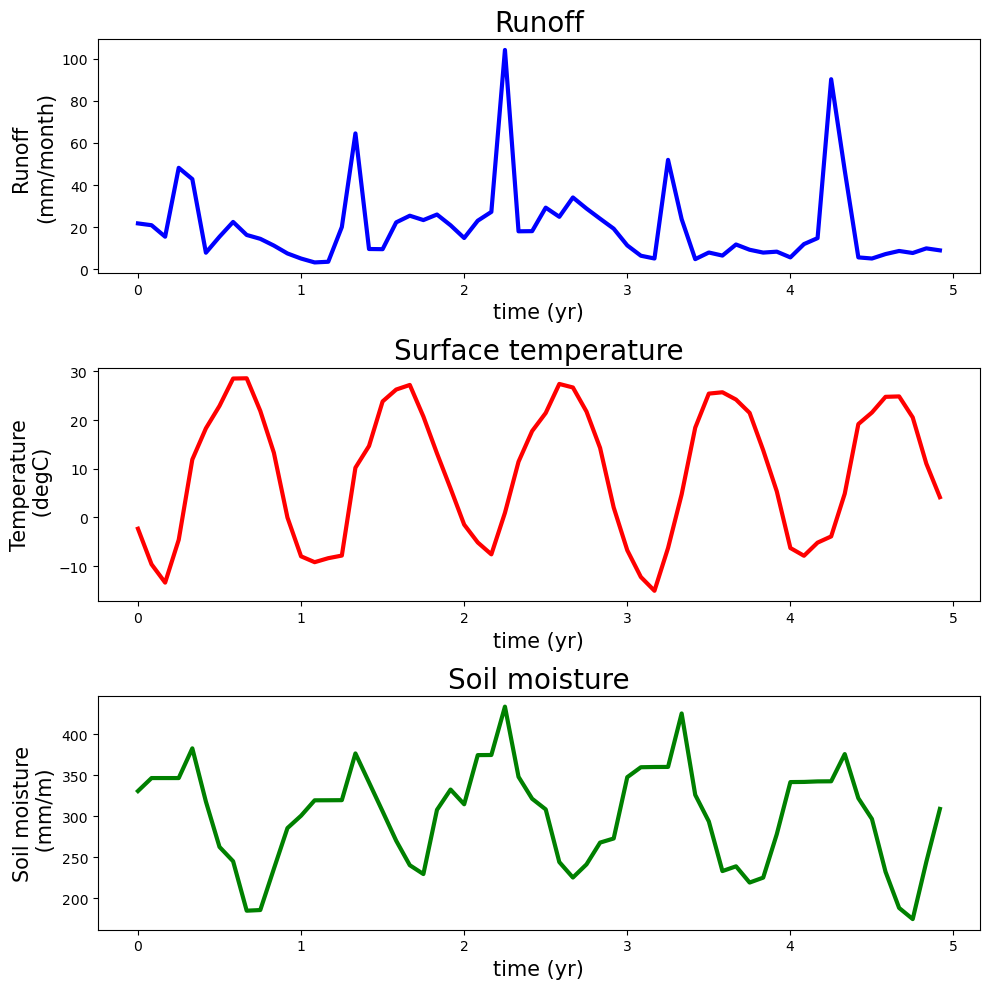

In [62]:
# --- make plots
plot_first_xyears = [5] # largest number is an intentional overshoot
ylabsize = 15
xlabsize = 15
titlesize = 20
save_transparent = False


for px in plot_first_xyears:
    # subset dat
    dfx1=df1[df1.iloc[:, 0] < px]
    dfx2=df2[df1.iloc[:, 0] < px]
    dfx3=df3[df1.iloc[:, 0] < px]
    
    # initialize figure 
    fig, axes = plt.subplots(3, 1, figsize=(10, 10))
    
    # subplot each var
    dfx1.plot(x="time", y="runoff_mm_month", ax=axes[0], linewidth=3, color='blue', legend=False)
    dfx2.plot(x="time", y="temperature_c", ax=axes[1], linewidth=3, color='red', legend=False)
    dfx3.plot(x="time", y="soilmoisture_mm_m", ax=axes[2], linewidth=3, color='green', legend=False)
    
    # titles and labels
    axes[0].set_title('Runoff', size=titlesize)
    axes[0].set_ylabel(f'Runoff \n(mm/month)', size=ylabsize)
    axes[0].set_xlabel("time (yr)", size=xlabsize)
    
    axes[1].set_title('Surface temperature', size=titlesize)
    axes[1].set_ylabel(f'Temperature\n (degC)', size=ylabsize)
    axes[1].set_xlabel("time (yr)", size=xlabsize)
    
    axes[2].set_title('Soil moisture', size=titlesize)
    axes[2].set_ylabel(f'Soil moisture\n (mm/m)', size=ylabsize)
    axes[2].set_xlabel("time (yr)", size=xlabsize)

    # adjust space between
    plt.subplots_adjust(hspace=0.5)
    
    plt.tight_layout()
    plt.show()

    # --- save the result
    if px < np.nanmax(df1['time']):
        fname = "first_" + str(px) + "_yrs.png"
    else:
        fname = "all_yrs.png"
    plt.savefig(os.path.join(save_clim_dir, fname), dpi=250, bbox_inches='tight', transparent=save_transparent)
    # --- close to release memory
    plt.close()



In [63]:
px < np.nanmax(df1['time'])

True